# Qiskit Demo

## Section 1: Setting up your IBM Account

In [4]:
from qiskit import IBMQ
# 
# API_TOKEN = '16543e3f94d76ac6815b662b7ab50d7ff210d2870fe75a173890679a256a991e5df6effef4c700fa7e385c04c218485b0522428972bf6ab789ebfa257bf8f73b'
# url = 'https://quantumexperience.ng.bluemix.net/api'
# 
# IBMQ.save_account(API_TOKEN, url=url)

IBMQ.load_accounts()

In [5]:
# You can also see account details

print(IBMQ.stored_accounts())
print(IBMQ.active_accounts())

[{'token': '16543e3f94d76ac6815b662b7ab50d7ff210d2870fe75a173890679a256a991e5df6effef4c700fa7e385c04c218485b0522428972bf6ab789ebfa257bf8f73b', 'url': 'https://quantumexperience.ng.bluemix.net/api'}]
[{'token': '16543e3f94d76ac6815b662b7ab50d7ff210d2870fe75a173890679a256a991e5df6effef4c700fa7e385c04c218485b0522428972bf6ab789ebfa257bf8f73b', 'url': 'https://quantumexperience.ng.bluemix.net/api'}]


In [7]:
# Basic quantum circuit stuff

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(4, name='q')
tmp = QuantumRegister(1, name='t')
meas = ClassicalRegister(4, name='m')

In [8]:
# Start by making our oracle
oracle = QuantumCircuit(q, tmp, meas, name='Oracle')
s = 14

for i in range(len(q)):
    if s & (1 << i):
        oracle.cx(q[i], tmp[0])


In [9]:
print(oracle.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg t[1];
creg m[4];
cx q[1],t[0];
cx q[2],t[0];
cx q[3],t[0];



In [10]:
# Now we prepare the actual BV circuit

bv = QuantumCircuit(q, tmp, meas)
bv.x(tmp[0])

# If we don't provide an index, the gate applies to the whole register
bv.h(q)
bv.h(tmp)

# We'll come back to this
bv += oracle # Same as bv = bv + oracle

# Second layer of hadamards
bv.h(q)
bv.h(tmp)

bv.measure(q, meas)

In [11]:
print(bv.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg t[1];
creg m[4];
x t[0];
h q[0];
h q[1];
h q[2];
h q[3];
h t[0];
cx q[1],t[0];
cx q[2],t[0];
cx q[3],t[0];
h q[0];
h q[1];
h q[2];
h q[3];
h t[0];
measure q[0] -> m[0];
measure q[1] -> m[1];
measure q[2] -> m[2];
measure q[3] -> m[3];



## Section 3: Basic Visualization

In [13]:
# Show text Circuit.  Same as "bv.draw(output='text')
bv.draw()

<pre style="word-wrap: normal;white-space: pre;line-height: 15px;">        ┌───┐┌───┐     ┌─┐                             
q_0: |0>┤ H ├┤ H ├─────┤M├─────────────────────────────
        ├───┤└───┘     └╥┘┌───┐     ┌─┐                
q_1: |0>┤ H ├───────■───╫─┤ H ├─────┤M├────────────────
        ├───┤       │   ║ └───┘     └╥┘┌───┐┌─┐        
q_2: |0>┤ H ├───────┼───╫───■────────╫─┤ H ├┤M├────────
        ├───┤       │   ║   │        ║ └───┘└╥┘┌───┐┌─┐
q_3: |0>┤ H ├───────┼───╫───┼────■───╫───────╫─┤ H ├┤M├
        ├───┤┌───┐┌─┴─┐ ║ ┌─┴─┐┌─┴─┐ ║       ║ ├───┤└╥┘
t_0: |0>┤ X ├┤ H ├┤ X ├─╫─┤ X ├┤ X ├─╫───────╫─┤ H ├─╫─
        └───┘└───┘└───┘ ║ └───┘└───┘ ║       ║ └───┘ ║ 
 m_0: 0 ════════════════╩════════════╬═══════╬═══════╬═
                                     ║       ║       ║ 
 m_1: 0 ═════════════════════════════╩═══════╬═══════╬═
                                             ║       ║ 
 m_2: 0 ═════════════════════════════════════╩═══════╬═
                                                     ║ 
 m_3: 0 ═════════════════════════════════════════════╩═
                                                       </pre>

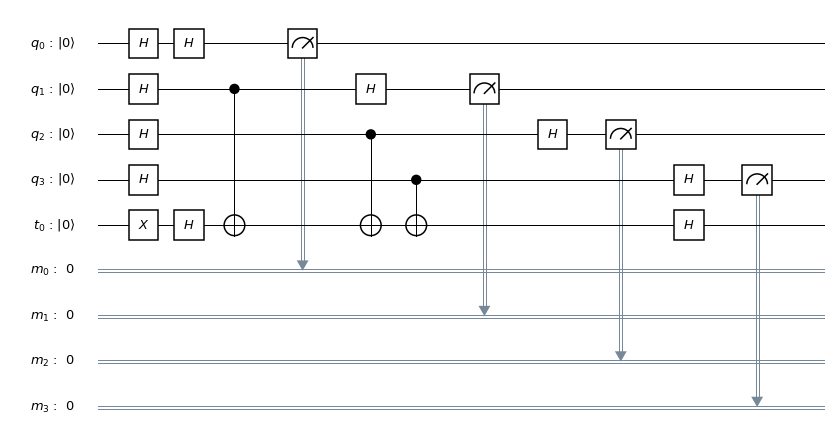

In [14]:
%matplotlib inline
bv.draw(output='mpl')

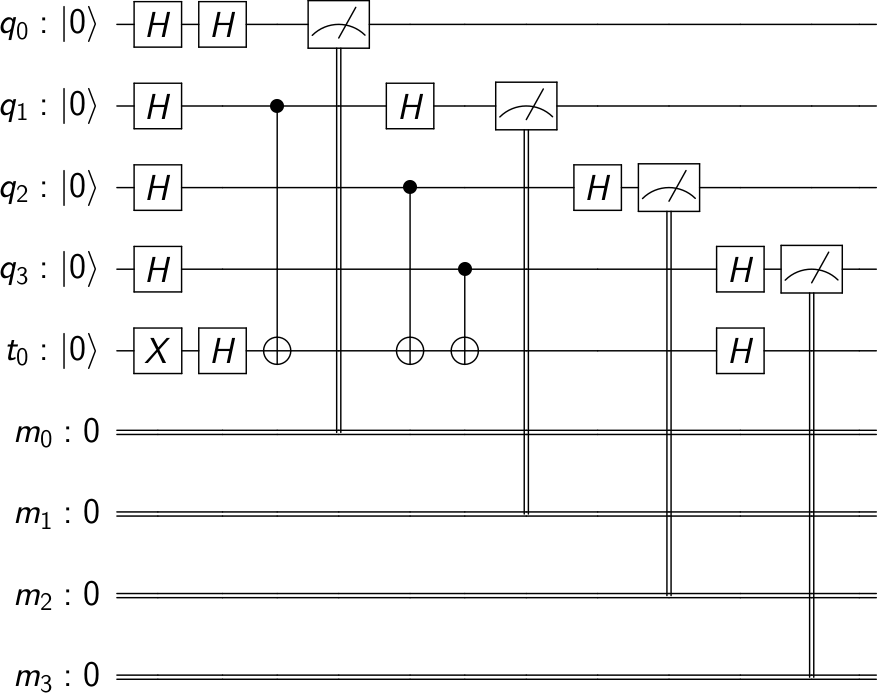

In [15]:
# Show latex
bv.draw(output='latex')

In [17]:
bv.draw(output='latex_source', filename='MerkleisImpatient')

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[draft]{beamer}\n% img_width = 9, img_depth = 13\n\\usepackage[size=custom,height=13,width=22,scale=0.7]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n\\pdfmapfile{+sansmathaccent.map}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n\\begin{document}\n\\begin{equation*}\n    \\Qcircuit @C=0.5em @R=1.0em @!R {\n\t \t\\lstick{q_{0}: \\ket{0}} & \\gate{H} & \\gate{H} & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{q_{1}: \\ket{0}} & \\gate{H} & \\qw & \\ctrl{3} & \\qw & \\gate{H} & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\lstic

In [18]:
# Now let's clean up our circuit by using barrier
circ = QuantumCircuit(q, tmp, meas)

circ.x(tmp[0])
circ.barrier()

circ.h(q)
circ.h(tmp)
circ.barrier()

circ += oracle
circ.barrier()

circ.h(q)
circ.h(tmp)
circ.barrier()

circ.measure(q, meas)

In [19]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg t[1];
creg m[4];
x t[0];
barrier q[0],q[1],q[2],q[3],t[0];
h q[0];
h q[1];
h q[2];
h q[3];
h t[0];
barrier q[0],q[1],q[2],q[3],t[0];
cx q[1],t[0];
cx q[2],t[0];
cx q[3],t[0];
barrier q[0],q[1],q[2],q[3],t[0];
h q[0];
h q[1];
h q[2];
h q[3];
h t[0];
barrier q[0],q[1],q[2],q[3],t[0];
measure q[0] -> m[0];
measure q[1] -> m[1];
measure q[2] -> m[2];
measure q[3] -> m[3];



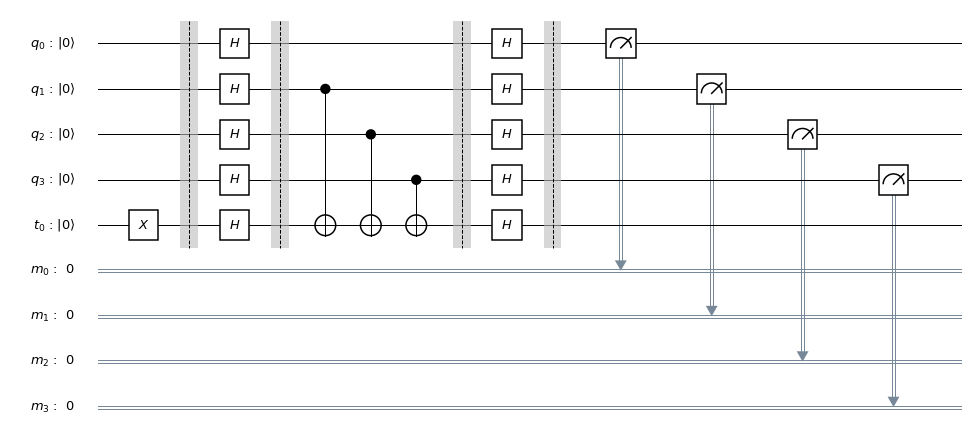

In [20]:
circ.draw(output='mpl')

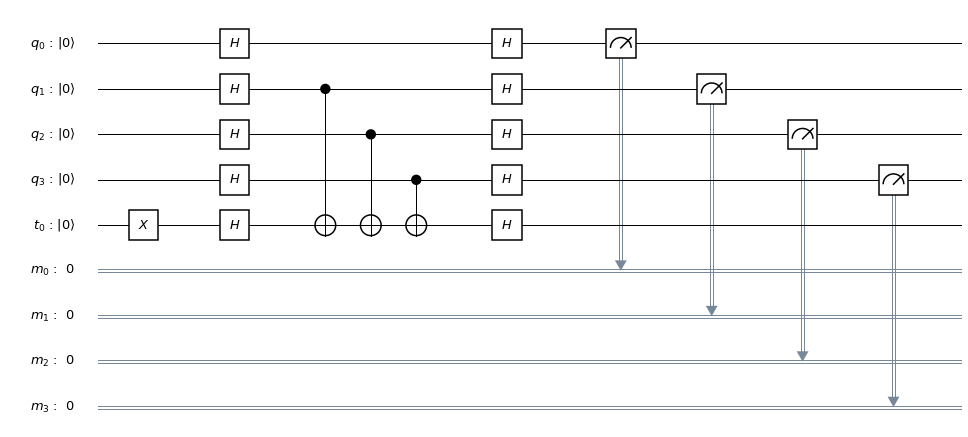

In [22]:
# Even better cleanuo
circ.draw(output='mpl', plot_barriers=False, filename='bv-circ')

## Section 5: Integrating Circuits